In [4374]:
import pandas as pd
import numpy as np
import pickle

In [4375]:
pd.set_option('display.max_columns', 35)

In [4376]:
BoiseWeatherData = pd.read_csv("BoiseWeatherData.csv")

In [4377]:
BoiseWeatherData

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Boise, Idaho",2021-01-01,43.0,30.8,36.9,36.1,24.6,31.1,28.6,73.3,0.00,0,0.00,NaN,0.0,0.0,31.7,15.9,126.4,1023.8,66.0,8.4,68.6,5.9,4,NaN,2021-01-01T08:18:19,2021-01-01T17:19:05,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KBOI,KEUL,72681524106,BOII,TS587,TT289,7268139..."
1,"Boise, Idaho",2021-01-02,46.1,33.2,38.7,42.0,26.7,32.8,30.2,72.2,0.02,100,4.17,"rain,snow",0.0,0.0,27.7,13.8,134.2,1020.8,81.7,9.5,46.2,4.1,3,NaN,2021-01-02T08:18:20,2021-01-02T17:20:00,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"KBOI,KEUL,72681524106,TS587,LLAI1,72681394195,..."
2,"Boise, Idaho",2021-01-03,50.0,38.0,41.1,50.0,30.5,35.6,35.5,80.9,0.31,100,41.67,rain,0.0,0.0,NaN,12.6,120.3,1019.0,67.8,9.7,45.8,3.9,2,NaN,2021-01-03T08:18:19,2021-01-03T17:20:57,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139..."
3,"Boise, Idaho",2021-01-04,47.7,38.1,42.4,42.8,32.5,35.4,34.0,73.1,0.26,100,33.33,rain,0.0,0.0,35.6,23.8,129.6,1014.4,79.5,9.2,10.5,0.7,0,NaN,2021-01-04T08:18:16,2021-01-04T17:21:55,0.65,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139..."
4,"Boise, Idaho",2021-01-05,44.1,32.0,37.7,44.1,26.5,33.9,29.4,73.9,0.00,0,0.00,NaN,0.0,0.0,NaN,11.4,154.1,1025.0,24.2,9.9,86.8,7.6,4,NaN,2021-01-05T08:18:10,2021-01-05T17:22:55,0.70,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,"Boise, Idaho",2022-09-12,83.8,60.0,70.6,81.0,60.0,70.3,30.3,23.1,0.00,0,0.00,NaN,0.0,0.0,15.4,12.7,216.4,1012.6,0.1,7.8,185.4,16.0,8,10.0,2022-09-12T07:20:53,2022-09-12T20:00:20,0.53,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,BOII,72681394195,72681024131,KMUO"
620,"Boise, Idaho",2022-09-13,76.9,63.0,69.2,76.9,63.0,69.2,49.1,50.2,0.07,100,8.33,rain,0.0,0.0,16.6,15.0,162.6,1008.0,32.6,8.3,133.1,11.3,7,10.0,2022-09-13T07:22:01,2022-09-13T19:58:30,0.56,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KBOI,KEUL,BOII,72681394195,72681024131,KMUO"
621,"Boise, Idaho",2022-09-14,81.1,56.9,69.1,80.0,56.9,69.0,51.4,56.2,0.00,0,0.00,NaN,0.0,0.0,11.2,8.0,175.5,1008.3,1.2,9.9,232.9,20.2,8,30.0,2022-09-14T07:23:08,2022-09-14T19:56:40,0.60,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,BOII,KMUO"
622,"Boise, Idaho",2022-09-15,81.0,62.0,70.9,79.9,62.0,70.8,48.3,46.3,0.00,0,0.00,rain,0.0,0.0,30.0,18.4,211.7,1011.0,40.8,9.9,181.2,15.5,8,30.0,2022-09-15T07:24:15,2022-09-15T19:54:51,0.64,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KBOI,KEUL,BOII,TT289,KMUO"


In [4378]:
BoiseWeatherData = BoiseWeatherData.drop(columns=['moonphase', 'uvindex', 'solarradiation', 'dew', 'temp', 'tempmax', 'feelslikemax', 'feelslikemin', 'feelslike', 'visibility', 'cloudcover', 'sunrise', 'sunset', 'stations', 'name', 'icon', 'conditions', 'description', 'severerisk', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth'])


In [4379]:
BoiseWeatherData = BoiseWeatherData.fillna(0)

In [4380]:
BoiseWeatherData['datetime'] = pd.to_datetime(BoiseWeatherData['datetime'])

In [4381]:
# BoiseWeatherData['month'] = BoiseWeatherData.datetime.dt.month

In [4382]:
BoiseWeatherData['season'] = BoiseWeatherData.datetime.dt.month%12 // 3 + 1

In [4383]:
BoiseWeatherData.drop('datetime', axis=1, inplace=True)

In [4384]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
BoiseWeatherData = pd.DataFrame(scaler.fit_transform(BoiseWeatherData), columns=BoiseWeatherData.columns)
BoiseWeatherData

,tempmin,humidity,precip,windgust,windspeed,winddir,sealevelpressure,solarenergy,season
0,-0.453110,0.714185,0.00,0.436090,0.144737,-0.676603,0.958115,-0.813665,-1.0
1,-0.363974,0.683133,0.02,0.235589,-0.131579,-0.606143,0.643979,-0.925466,-1.0
2,-0.185701,0.928723,0.31,-1.152882,-0.289474,-0.731707,0.455497,-0.937888,-1.0
3,-0.181987,0.708539,0.26,0.631579,1.184211,-0.647696,-0.026178,-1.136646,-1.0
4,-0.408542,0.731122,0.00,-1.152882,-0.447368,-0.426378,1.083770,-0.708075,-1.0
...,...,...,...,...,...,...,...,...,...
619,0.631383,-0.702893,0.00,-0.380952,-0.276316,0.136405,-0.214660,-0.186335,2.0
620,0.742804,0.062103,0.07,-0.320802,0.026316,-0.349593,-0.696335,-0.478261,2.0
621,0.516249,0.231475,0.00,-0.591479,-0.894737,-0.233062,-0.664921,0.074534,2.0
622,0.705664,-0.047989,0.00,0.350877,0.473684,0.093948,-0.382199,-0.217391,2.0


In [4385]:
BoiseWeatherData

,tempmin,humidity,precip,windgust,windspeed,winddir,sealevelpressure,solarenergy,season
0,-0.453110,0.714185,0.00,0.436090,0.144737,-0.676603,0.958115,-0.813665,-1.0
1,-0.363974,0.683133,0.02,0.235589,-0.131579,-0.606143,0.643979,-0.925466,-1.0
2,-0.185701,0.928723,0.31,-1.152882,-0.289474,-0.731707,0.455497,-0.937888,-1.0
3,-0.181987,0.708539,0.26,0.631579,1.184211,-0.647696,-0.026178,-1.136646,-1.0
4,-0.408542,0.731122,0.00,-1.152882,-0.447368,-0.426378,1.083770,-0.708075,-1.0
...,...,...,...,...,...,...,...,...,...
619,0.631383,-0.702893,0.00,-0.380952,-0.276316,0.136405,-0.214660,-0.186335,2.0
620,0.742804,0.062103,0.07,-0.320802,0.026316,-0.349593,-0.696335,-0.478261,2.0
621,0.516249,0.231475,0.00,-0.591479,-0.894737,-0.233062,-0.664921,0.074534,2.0
622,0.705664,-0.047989,0.00,0.350877,0.473684,0.093948,-0.382199,-0.217391,2.0


In [4386]:
len(BoiseWeatherData[BoiseWeatherData['precip'] == 0]) / len(BoiseWeatherData)

0.7916666666666666

In [4387]:
list(BoiseWeatherData)

['tempmin',
 'humidity',
 'precip',
 'windgust',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'solarenergy',
 'season']

In [4388]:
BoiseWeatherData['rain'] = (BoiseWeatherData['precip'] > 0).astype(int)

In [4389]:
BoiseWeatherData = BoiseWeatherData.drop(columns=['precip'])

In [4390]:
BoiseWeatherData['rain']

0      0
1      1
2      1
3      1
4      0
      ..
619    0
620    1
621    0
622    0
623    0
Name: rain, Length: 624, dtype: int64

In [4391]:
# test=BoiseWeatherData.sample(frac=0.1)
# train=BoiseWeatherData.drop(test.index)

# train.shape, test.shape

In [4392]:
with open("trainSplit", "rb") as fp:   # Unpickling
    trainIndices = pickle.load(fp)

In [4393]:
with open("testSplit", "rb") as fp:   # Unpickling
    testIndices = pickle.load(fp)

In [4394]:
train = BoiseWeatherData.iloc[trainIndices]

In [4395]:
test = BoiseWeatherData.iloc[testIndices]

In [4396]:
train

,tempmin,humidity,windgust,windspeed,winddir,sealevelpressure,solarenergy,season,rain
0,-0.453110,0.714185,0.436090,0.144737,-0.676603,0.958115,-0.813665,-1.0,0
1,-0.363974,0.683133,0.235589,-0.131579,-0.606143,0.643979,-0.925466,-1.0,1
2,-0.185701,0.928723,-1.152882,-0.289474,-0.731707,0.455497,-0.937888,-1.0,1
3,-0.181987,0.708539,0.631579,1.184211,-0.647696,-0.026178,-1.136646,-1.0,1
4,-0.408542,0.731122,-1.152882,-0.447368,-0.426378,1.083770,-0.708075,-1.0,0
...,...,...,...,...,...,...,...,...,...
618,0.441968,-0.711362,-0.626566,-0.289474,-0.149955,0.256545,0.080745,2.0,0
619,0.631383,-0.702893,-0.380952,-0.276316,0.136405,-0.214660,-0.186335,2.0,0
621,0.516249,0.231475,-0.591479,-0.894737,-0.233062,-0.664921,0.074534,2.0,0
622,0.705664,-0.047989,0.350877,0.473684,0.093948,-0.382199,-0.217391,2.0,0


In [4397]:
test

,tempmin,humidity,windgust,windspeed,winddir,sealevelpressure,solarenergy,season,rain
159,0.482823,-0.437544,0.511278,1.197368,0.856369,-0.560209,0.664596,1.0,0
126,0.259981,-0.364150,0.676692,1.671053,1.112918,-0.193717,0.403727,0.0,0
486,0.000000,0.465773,0.636591,1.078947,-0.022584,-0.643979,-0.204969,0.0,1
34,-0.631383,0.756528,-0.110276,-0.605263,0.973803,1.282723,-0.658385,-1.0,0
228,0.817084,-0.395201,0.431078,0.776316,0.560072,-1.198953,-0.012422,1.0,0
...,...,...,...,...,...,...,...,...,...
297,0.000000,1.052929,0.170426,-0.171053,-0.813008,-1.282723,-1.068323,2.0,1
258,0.259981,-0.494001,0.406015,0.302632,0.755194,-0.162304,0.111801,2.0,0
517,0.475395,-0.220183,-0.055138,-0.276316,-0.568202,-0.518325,0.347826,1.0,0
110,-0.189415,-0.522230,0.105263,-0.131579,0.164408,-0.120419,0.503106,0.0,0


In [4398]:
x_train = np.array(train[train.columns[:-1]])
x_test = np.array(test[test.columns[:-1]])

In [4399]:
y_train = np.array(train['rain'])
y_test = np.array(test['rain'])

In [4400]:
model.fit(x_train, y_train)

LogisticRegression()

In [4401]:
y_pred = model.predict(x_test)

In [4402]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [4403]:
y_true = np.array(y_test)

In [4404]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.9516129032258065


In [4405]:
from collections import Counter

In [4406]:
y_test_counted = Counter(y_test)
y_test_counted

Counter({0: 51, 1: 11})

In [4407]:
y_test_counted.most_common()[0][1] / y_test_counted.total()

0.8225806451612904

In [4408]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[49,  2],
       [ 1, 10]])

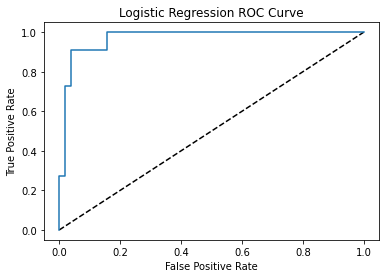

In [4409]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [4410]:
# This uses an integral
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9696969696969697

In [4411]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8695652173913043

**What worked and what didn't**

- When I made the datetime into seasons the accuracy did not change at all
- Added month and accuracy didn't change
- Dropping sealevel pressure increased accuracy from 91.9% to 93.5% (did not keep change as normalization fixed it as well)
- Normalized data using standard scaler and accuracy went down to 90.3%
- Normalized data using maxab scaler and accuracy went down to 88.7%
- Normalized data using robust scaler and accuracy increased from 91.9% to 93.5%
- Normalized data using quantile transfomer scaler and accuracy went down to 90.3%
- Removed 'feelslikemax', 'feelslikemin', 'feelslike', and 'visibility' columns as what the temperature feels like seems irrelevant to predicting rain compared to actual temperature and cloud cover and visibility are essentially the same thing as cloud cover affects visibility so I removed visibility. Accuracy did not change but since it did not change I chose to leave it out anyway.
- Removed 'cloudcover' and accuracy increased to 95.1%. I did this as uv index, solarradiation, and solarenergy are all affected by cloudcover and are more precise measurements so it was noise. 
- Started to remove anything that didn't change accuracy or that raised it. This included 'dew', 'moonphase' and 'month'. Even though 'season' didn't change accuracy before, removing it seemed to lower it so it seems it did have an affect. 'uvindex' and 'solarradiation' were also removed as this didn't change accuracy likely because 'solarenergy' has similar information. 'Dew' likely didn't affect much as its similar to humidity and 'month' likely didn't affect much as its similar to season. It generally makes sense that the moonphase would not affect rain.
- Tried adding hour that sunset or sunrise happened but that dropped accuracy by about 2%
- Tried making column that it rained yesterday and accuracy dropped about 2%
- Tried number of times it rained in a week and accuracy dropped by about 4%
- Tried placing temp in 10 buckets using pd.qcut and accuracy did not change